In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("treino.csv")
teste = pd.read_csv("teste.csv")

In [ ]:
df.info()  #Basic informations

In [ ]:
#checking which are categorical columns

for feature in df.columns:
    if df[feature].dtype not in ['int64', 'float64']:    #dtype means datatype
        print(f"{feature}:{df[feature].unique()}")

In [2]:
#encoding categorical variables to numeric ones
from sklearn.preprocessing import LabelEncoder
for c in df.columns:
    if df[c].dtype=='object':    #Since we are encoding object datatype to integer/float
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)

for c in teste.columns:
    if teste[c].dtype=='object':    #Since we are encoding object datatype to integer/float
        lbl = LabelEncoder()
        lbl.fit(list(teste[c].values))
        teste[c] = lbl.transform(teste[c].values)

In [ ]:
df.head()  #To check if properly encoded

In [ ]:
teste.head()

In [ ]:
df.info()

In [ ]:
teste.info()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (18,10))

sns.heatmap(df.corr(), annot =True)   #Basic correlation plot to understand which features are correlated

In [ ]:
df.hist(figsize=(20,16))
plt.show()  #showing the charts of different columns
#This also helps in finding number of counts in each column

Data is highly imbalanced phone service

In [3]:
zero  = df[df['PhoneService']==0]   #zero values in outcome column
one = df[df['PhoneService']==1]  # one values in outcome column
from sklearn.utils import resample
df_minority_upsampled = resample(zero, replace = True, n_samples = 2000) 
#concatenate
df = pd.concat([one, df_minority_upsampled])

from sklearn.utils import shuffle
df = shuffle(df) # shuffling so that there is particular sequence

In [ ]:
df.hist(figsize=(20,16))
plt.show()

In [ ]:
#Checking which columns are mostly correlated with the target
df.corr().abs()['Cliente'].sort_values(ascending = False)

In [11]:
X = df[['Contract', 'tenure', 'TechSupport', 'OnlineSecurity', 'PaperlessBilling',
       'DeviceProtection', 'Dependents', 'OnlineBackup', 'SeniorCitizen',
       'PaymentMethod', 'Partner', 'PhoneService', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'InternetService']] #taking only relevant columns
y = df['Cliente']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35)

In [5]:
teste = teste.drop(['gender'], axis = 1)
teste.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,1,23,1,0,2,1,1,1,1,1,1,1,0,3
1,0,0,0,27,1,0,0,2,2,0,0,0,0,0,1,3
2,0,0,0,2,1,0,2,1,1,1,1,1,1,0,0,3
3,0,0,0,48,1,0,1,2,0,2,2,2,2,2,1,1
4,0,1,0,71,1,0,1,0,2,2,2,2,2,2,1,2


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier
xgb =XGBClassifier(eval_metric = 'auc', use_label_encoder=False, objective = 'binary:logistic')
#eval metric is auc because for classification auc metric is best
#XGBoost
#parameters for xgboost

params_xgb = {'n_estimators': [100,400,800], 'learning_rate': [0.3, 0.35, 0.4, 0.45, 0.5, 1],
             'max_depth': [6,8,15]}
gs_xgb =  GridSearchCV(xgb, param_grid=params_xgb, cv=5)
gs_xgb.fit(X_train, y_train)
print("Best parameters for XGBoost:", gs_xgb.best_params_)


In [12]:
#got the best parameters above
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate = 0.5, max_depth = 8, n_estimators = 100,
                    eval_metric = 'auc',
                    use_label_encoder=False, 
                    objective = 'binary:logistic')

In [ ]:
xgb.fit(X,y)

In [ ]:
pred = xgb.predict(teste[['Contract', 'tenure', 'TechSupport', 'OnlineSecurity', 'PaperlessBilling',
       'DeviceProtection', 'Dependents', 'OnlineBackup', 'SeniorCitizen',
       'PaymentMethod', 'Partner', 'PhoneService', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'InternetService']])

In [ ]:
subm = pd.DataFrame()
subm['Cliente'] = pred
subm.to_csv('subm4victor.csv', index = False)

In [ ]:
subm

In [13]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

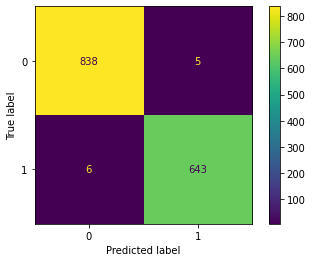

In [14]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(xgb, X_test, y_test)
plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import SGDClassifier 
from sklearn.ensemble import GradientBoostingClassifier     
# MÉTRICAS 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import f1_score 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import balanced_accuracy_score 
from sklearn.metrics import recall_score   
# TUNAGEM DE MODELOS 
from sklearn.ensemble import VotingClassifier 
from sklearn.ensemble import BaggingClassifier  
# EVITAR VARIAÇÕES DO MODELO DE ACORDO COM A AMOSTRA PARA TESTE 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [16]:
modelo = XGBClassifier(learning_rate = 1, max_depth = 8, n_estimators = 100,
                    eval_metric = 'auc',
                    use_label_encoder=False,
                    objective = 'binary:logistic')

In [17]:
def Hold_out_repetido(modelo, proporcao = 0.3, repeticoes = 50, x = df.drop("Cliente", axis = 1)):
    # MÉTRICAS
    f1_treino = []
    f1_teste = []
    acc_treino = []
    acc_teste = []
    bal_acc_treino = []
    bal_acc_teste = []
    precision_treino = []
    precision_teste = []
    recall_treino = []
    recall_teste = []

    # VARIAVEIS AUXILIARES E TARGET

    y = df["Cliente"]

    for i in range(repeticoes):
        # SEPARAÇÃO EM TESTE E TREINO E CRIAÇÃO DO MODELO
        x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = proporcao)
        mod = modelo
        mod.fit(x_treino, y_treino)
        # PREDIÇÃO DE TREINO E TESTE
        pred_treino = mod.predict(x_treino)
        pred_teste = mod.predict(x_teste)
# CALCULO DAS METRICAS
        f1_treino.append(f1_score(y_treino, pred_treino))
        f1_teste.append(f1_score(y_teste, pred_teste))
        acc_treino.append(accuracy_score(y_treino, pred_treino))
        acc_teste.append(accuracy_score(y_teste, pred_teste))
        bal_acc_treino.append(balanced_accuracy_score(y_treino, pred_treino))
        bal_acc_teste.append(balanced_accuracy_score(y_teste, pred_teste))
        precision_treino.append(precision_score(y_treino, pred_treino))
        precision_teste.append(precision_score(y_teste, pred_teste))
        recall_treino.append(recall_score(y_treino, pred_treino))
        recall_teste.append(recall_score(y_teste, pred_teste))

    # MEDIA DAS METRICAS
    res_treino_f1 = np.array(f1_treino).mean()
    res_teste_f1 = np.array(f1_teste).mean()
    res_treino_acc = np.array(acc_treino).mean()
    res_teste_acc = np.array(acc_teste).mean()
    res_treino_bal = np.array(bal_acc_treino).mean()
    res_teste_bal = np.array(bal_acc_teste).mean()
    res_treino_pre = np.array(precision_treino).mean()
    res_teste_pre = np.array(precision_teste).mean()
    res_treino_recall = np.array(recall_treino).mean()
    res_teste_recall = np.array(recall_teste).mean()

    print("=="*30)

    # CRIANDO OBJETO SERIES PARA DEPOIS COMPARAR RESULTADOS EM DATAFRAME
    indice = ["f1-score TREINO","f1-score TESTE","Accuracia TREINO", "Accuracia TESTE","Balanced Accuracy TREINO",
              "Balanced Accuracy TESTE", "Precisão TREINO", "Precisão TESTE", "Sensibilidade TREINO", "Sensibilidade TESTE"]

    dados = [res_treino_f1,res_teste_f1,res_treino_acc,res_teste_acc,res_treino_bal,res_teste_bal,res_treino_pre,res_teste_pre,
            res_treino_recall,res_teste_recall]

    col = f'Modelo'

    return pd.Series(data = dados, index = indice)

In [18]:
Hold_out_repetido(modelo=modelo)

f1-score TREINO             0.999646
f1-score TESTE              0.990383
Accuracia TREINO            0.999691
Accuracia TESTE             0.991665
Balanced Accuracy TREINO    0.999654
Balanced Accuracy TESTE     0.991310
Precisão TREINO             0.999924
Precisão TESTE              0.992208
Sensibilidade TREINO        0.999368
Sensibilidade TESTE         0.988594
dtype: float64